<div style="line-height: 0.4;">
    <h1 style="color: green; font-weight: bold; text-align: center;"></h1>
    <h1 style="color: green; font-weight: bold; text-align: center;">MARTINGALAS</h1>
    <h3 style="color: darkolivegreen; font-weight: bold; text-align: center;">CURSO 3 (PROCESOS ESTOCÁSTICOS I</h3>
    <h5 style="color: darkolivegreen; font-weight: bold; text-align: center;">PARTE 2 / LECCIÓN 1</h5>
</div>


<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 1</h4>
Veremos como simular con numpy la martingala. Esta sera una estrategia de apuestas que esta popularizada en la ruleta y tiene la siguiente estructura:
 * Se comienza con una apuesta Inicial. (Se apuesta siempre al negro.)
 * Si se gana, se vuelve a la apuesta inicial.
 * Si se pierde, se dobla la apuesta.


In [1]:
import random

def martingala(inicial, apuesta, prob_ganar, objetivo):
    balance = inicial
    bet = apuesta

    while balance >0 and balance < inicial + objetivo:
        rojo = random.random() < prob_ganar
        if rojo:
            balance -= bet
            bet *= 2
        else:
            balance += bet
            bet = apuesta

        if bet>balance:
            break
    return balance

In [24]:
print(martingala(inicial=1000,
                     apuesta=10,
                     prob_ganar=0.48,
                     objetivo=2000))

1150


<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 2</h4>


Simulacion 1: ¿Es martingala? False
Simulacion 2: ¿Es martingala? False
Simulacion 3: ¿Es martingala? False
Simulacion 4: ¿Es martingala? False
Simulacion 5: ¿Es martingala? False


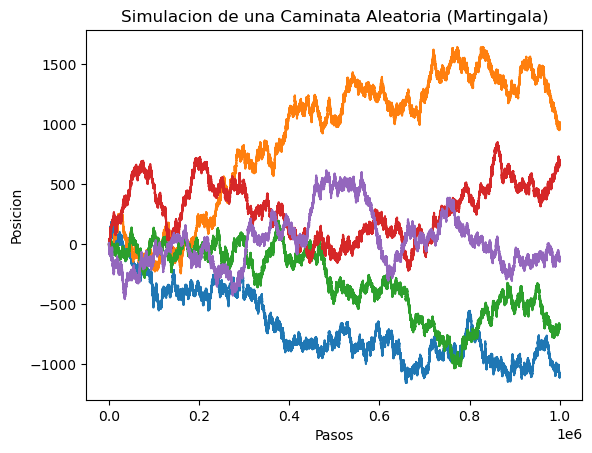

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Parametros
n_steps = 1000000
n_simulations = 5

# Funcion para simular la caminata aleatoria
def simulate_random_walk(n_steps):
    steps = np.random.choice([-1, 1], size=n_steps)
    walk = np.cumsum(steps)
    return walk

# Verificacion de la propiedad de martingala
def verify_martingale_property(walk):
    for i in range(1, len(walk)):
        expected_value = walk[i-1]
        if walk[i] != expected_value:
            return False
    return True

# Simulacion y verificacion
for _ in range(n_simulations):
    walk = simulate_random_walk(n_steps)
    is_martingale = verify_martingale_property(walk)
    print(f"Simulacion {_+1}: ¿Es martingala? {is_martingale}")
    plt.plot(walk)

plt.title("Simulacion de una Caminata Aleatoria (Martingala)")
plt.xlabel("Pasos")
plt.ylabel("Posicion")
plt.show()

<h4 style="color: green; font-weight: bold; text-align: left;">Ejercicio 3</h4>


Error medio: 0.098455
Desviación estándar del error: 5.143335


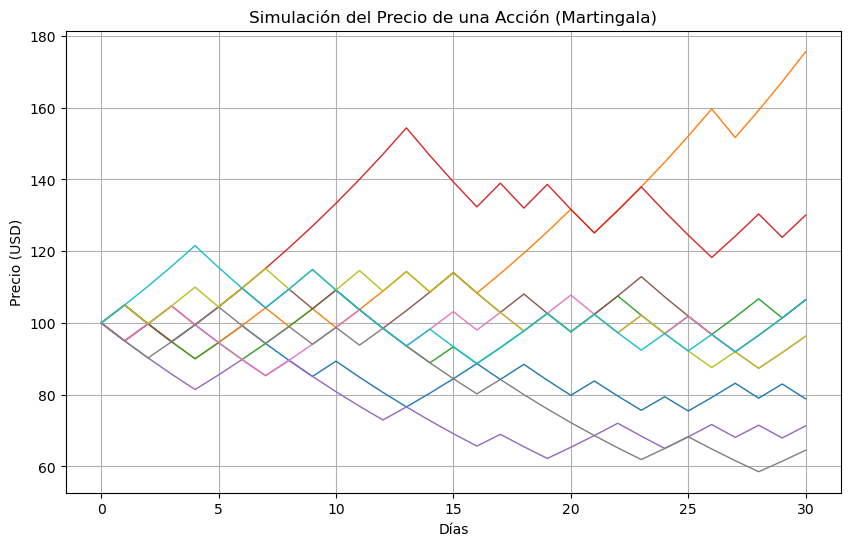

In [39]:

# Parámetros
n_days = 30
n_simulations = 100
initial_price = 100
delta = 0.05  # Variación diaria (5%)

# Función para simular una trayectoria del precio
def simulate_stock_price(n_days):
    price = [initial_price]
    for _ in range(n_days):
        # Generar movimiento +5% o -5% con igual probabilidad
        movement = np.random.choice([1 + delta, 1 - delta])
        price.append(price[-1] * movement)
    return price

# Simulación de múltiples trayectorias
simulations = np.array([simulate_stock_price(n_days) for _ in range(n_simulations)])

# Verificación de la propiedad de martingala
errors = []
for n in range(n_days):
    # Calcular E(S_{n+1} | S_n) para todas las simulaciones
    current_prices = simulations[:, n]
    next_prices = simulations[:, n + 1]
    expected_next = current_prices * (0.5 * (1 + delta) + 0.5 * (1 - delta))  # E[movement] = 1
    errors.extend(next_prices - expected_next)  # Debería aproximarse a 0

# Análisis estadístico de los errores
mean_error = np.mean(errors)
std_error = np.std(errors)
print(f"Error medio: {mean_error:.6f}")
print(f"Desviación estándar del error: {std_error:.6f}")

# Visualización de 10 trayectorias
plt.figure(figsize=(10, 6))
for i in range(10):
    plt.plot(simulations[i], lw=1)
plt.title("Simulación del Precio de una Acción (Martingala)")
plt.xlabel("Días")
plt.ylabel("Precio (USD)")
plt.grid(True)
plt.show()